In [24]:
import pandas as pd
df = pd.read_csv("clean.csv")
df.head()

,Row,Churn Value,Churn Score,Monthly Charges,Total Charges,Tenure Months,CLTV,Gender,Senior Citzen,Partner,...,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Internet Service,Contract,Paperless Billing
0,0,1,86,53.85,108.15,2,3239,1,1,1,...,0,1,1,0,0,0,0,0,1,1
1,1,1,67,70.70,151.65,2,2701,0,1,1,...,0,0,0,0,0,0,0,0,1,1
2,2,1,86,99.65,820.5,8,5372,0,1,1,...,1,0,0,1,0,1,1,0,1,1
3,3,1,84,104.80,3046.05,28,5003,0,1,0,...,1,0,0,1,1,1,1,0,1,1
4,4,1,89,103.70,5036.3,49,5340,1,1,1,...,1,0,1,1,0,1,1,0,1,1


In [79]:
import statsmodels.api as sm
import numpy as np
df = df.dropna()
X = df["Churn Score"]
y = df["Total Charges"]
#X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Total Charges   R-squared (uncentered):                   0.405
Model:                            OLS   Adj. R-squared (uncentered):              0.405
Method:                 Least Squares   F-statistic:                              4780.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):                        0.00
Time:                        06:15:32   Log-Likelihood:                         -64947.
No. Observations:                7032   AIC:                                  1.299e+05
Df Residuals:                    7031   BIC:                                  1.299e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Churn Score    32.7276      0.473     69.137      0.000      31.800      33.656
==============================================================================
Omnibus:                      622.732   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.285
Skew:                           0.807   Prob(JB):                    8.16e-171
Kurtosis:                       2.745   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## R squared value
The r-squared value is 0.405, which means 40.5% of the change in the total charges can be attributed to the churn score.

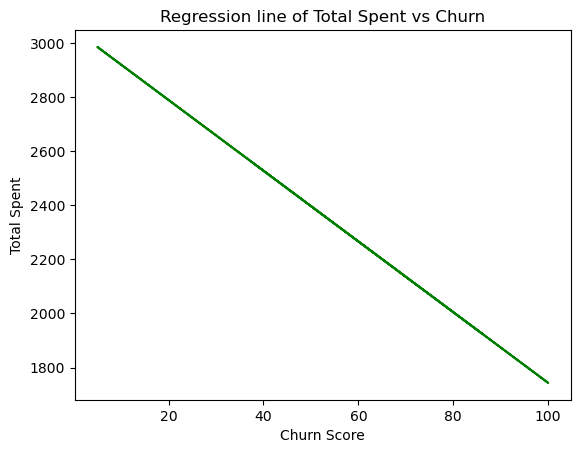

In [81]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
a = df.iloc[:, 2].values.reshape(-1, 1) 
b = df.iloc[:, 4].values.reshape(-1, 1)

linear_regressor = LinearRegression().fit(a, b)
y_pred = linear_regressor.predict(a)

#plt.scatter(a, b) #- there are too many points on the graph, beacuse of how many rows/values there are
plt.title("Regression line of Total Spent vs Churn")
plt.xlabel("Churn Score")
plt.ylabel("Total Spent")
plt.plot(a, y_pred, color='green')

plt.show()

## Results and Conclusion

There is a negative correlation when it comes to total charges and churn. The higher the total values, the lower the churn rate. We would assume this is because of customer loyalty. Those who have stayed for a long time with the service, and spent a lot of money, are less likely to churn. The company should focus on boosting loyalty, and maybe introduce better loyalty or customer rewards programs.